In [1]:
import numpy as np
import scipy.io as spio
import scipy.stats
import tensorflow
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from attention import attention
import math
from scipy.stats import zscore
import tensorflow.keras as keras
from tensorflow.keras import layers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)


In [2]:
def custom_loss(Y_true, Y_pred):
    PSNR = tf.image.psnr(Y_true, Y_pred, max_val = 255.0)
    return PSNR

In [3]:
data = spio.loadmat("Indian_pines.mat")["indian_pines"]   
data_gt = spio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
data_norm = zscore(data)

In [23]:
data = spio.loadmat("Indian_pines.mat")

In [24]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
         [2580, 4266, 4502, ..., 1029, 1020, 1000],
         [3687, 4266, 4421, ..., 1030, 1016, 1009],
         ...,
         [2570, 3890, 4320, ..., 1021, 1015, 1025],
         [3170, 4130, 4320, ..., 1024, 1020, 1011],
         [3172, 3890, 4316, ..., 1034, 1016, 1015]],
 
        [[2576, 4388, 4334, ..., 1030, 1006, 1015],
         [2747, 4264, 4592, ..., 1039, 1015, 1020],
         [2750, 4268, 4423, ..., 1026, 1015, 1020],
         ...,
         [3859, 4512, 4605, ..., 1035, 1015,  996],
         [3686, 4264, 4690, ..., 1012, 1020, 1014],
         [2744, 4268, 4597, ..., 1019, 1016, 1010]],
 
        [[2744, 4146, 4416, ..., 1029, 1025, 1010],
         [2576, 4389, 4416, ..., 1021, 1011, 1000],
         [2744, 4273, 4420, ..., 1033, 1010, 1014],
         ...,
         [2570, 4

In [6]:
data_norm1.shape

(1, 145, 145, 220)

In [7]:
import math
from skimage.metrics import structural_similarity
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  

def ssim(y_true,y_pred):
    data1 = np.squeeze(y_true)
    data2 = np.squeeze(y_pred)
    return structural_similarity(data1,data2)
# def metrics(y_true,y_pred):
    

In [5]:
data_norm1 = np.reshape(data_norm, (1,145,145,220))

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1cebde65148>)

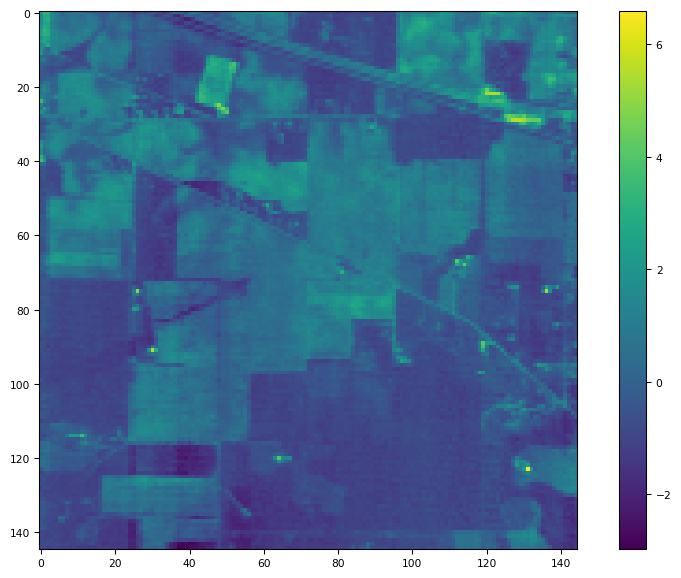

In [19]:
import tifffile
tifffile.imshow(data_norm1[:,:,:,7])

In [372]:
a=[]
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            print(f'data_norm[{i},{j},{k}]' ,data_norm[i,j,k])
            a.append(data_norm[i,j,k])
            
len(a)

data_norm[0,0,0] 0.6285531056360006
data_norm[0,0,1] 1.136157709192866
data_norm[0,1,0] -1.4551901073642095
data_norm[0,1,1] 1.873844117951463
data_norm[1,0,0] -1.380306339225802
data_norm[1,0,1] 2.3476471713149962
data_norm[1,1,0] -0.8098277797543793
data_norm[1,1,1] 1.8644894132827434


8

In [373]:
import bitstring
a=[]
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            f1=bitstring.BitArray(float=data_norm[i,j,k], length=32)
            a.append(f1.bin)
            

# f1 = bitstring.BitArray(float=data_norm[0,0,0], length=32)
# print(a.bin)
len(a)

8

In [368]:
f1

BitArray('0x3f20e8db')

In [374]:
data_norm.shape

(145, 145, 220)

In [375]:
145*145*220*8

37004000

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1cebd240988>)

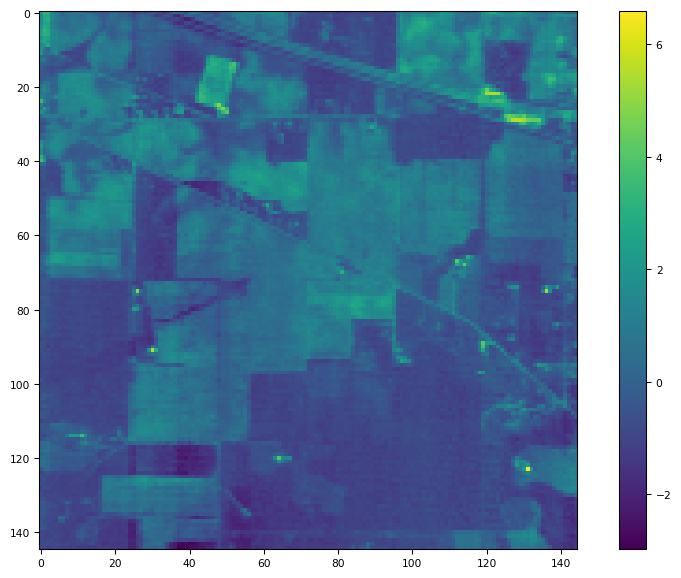

In [20]:
import tifffile
tifffile.imshow(data_norm[:,:,7])

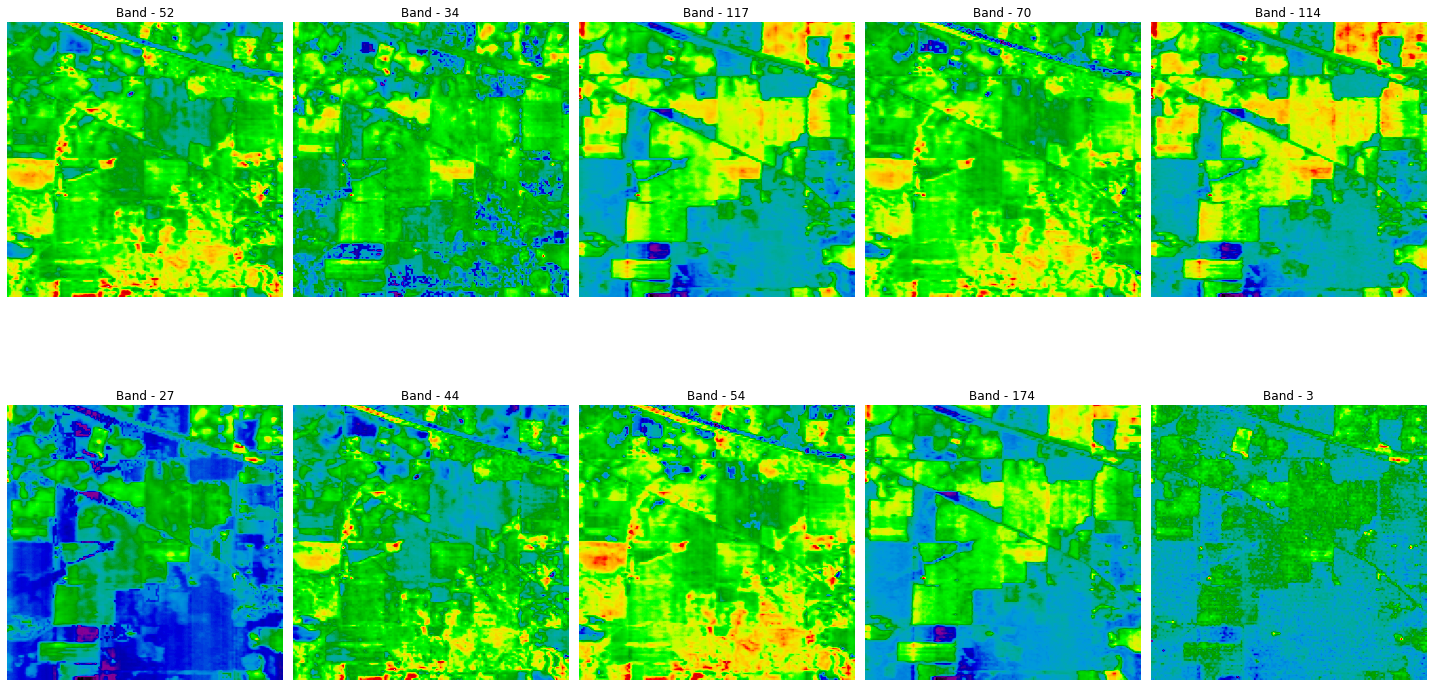

In [24]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(220)
        ax[i][j].imshow(data_norm[:, :, c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [33]:
opt = Adam(lr=0.0009, beta_1=0.9,beta_2 = 0.999)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

model.compile(optimizer = opt, metrics = "mse", loss = "mse")

model.fit(data_norm1, data_norm1, epochs = 350)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/350
1/1 [==============================] - 4s 4s/step - loss: 1.0003 - mse: 1.0003
Epoch 2/350
1/1 [==============================] - 2s 2s/step - loss: 0.9990 - mse: 0.9990
Epoch 3/350
1/1 [==============================] - 3s 3s/step - loss: 0.9579 - mse: 0.9579
Epoch 4/350
1/1 [==============================] - 2s 2s/step - loss: 1.2212 - mse: 1.2212
Epoch 5/350
1/1 [==============================] - 2s 2s/step - loss: 0.8602 - mse: 0.8602
Epoch 6/350
1/1 [==============================] - 2s 2s/step - loss: 0.8946 - mse: 0.8946
Epoch 7/350
1/1 [==============================] - 2s 2s/step - loss: 0.8799 - mse: 0.8799
Epoch 8/350
1/1 [==============================] - 2s 2s/step - loss: 0.8584 - mse: 0.8584
Epoch 9/350
1/1 [==============================] - 2s 2s/step - loss: 0.8642 - mse: 0.8642
Epoch 10/350
1/1 [==============================] - 2s 2s/step - loss: 0.8760 - mse: 0.8760
Epoch 11/350
1/1 [==============================] - 2s 2s/step - loss: 0.8659 - mse: 0.86

1/1 [==============================] - 2s 2s/step - loss: 0.2199 - mse: 0.2199
Epoch 179/350
1/1 [==============================] - 2s 2s/step - loss: 0.2177 - mse: 0.2177
Epoch 180/350
1/1 [==============================] - 2s 2s/step - loss: 0.2157 - mse: 0.2157
Epoch 181/350
1/1 [==============================] - 2s 2s/step - loss: 0.2177 - mse: 0.2177
Epoch 182/350
1/1 [==============================] - 2s 2s/step - loss: 0.2166 - mse: 0.2166
Epoch 183/350
1/1 [==============================] - 2s 2s/step - loss: 0.2138 - mse: 0.2138
Epoch 184/350
1/1 [==============================] - 2s 2s/step - loss: 0.2169 - mse: 0.2169
Epoch 185/350
1/1 [==============================] - 2s 2s/step - loss: 0.2160 - mse: 0.2160
Epoch 186/350
1/1 [==============================] - 2s 2s/step - loss: 0.2123 - mse: 0.2123
Epoch 187/350
1/1 [==============================] - 2s 2s/step - loss: 0.2167 - mse: 0.2167
Epoch 188/350
1/1 [==============================] - 2s 2s/step - loss: 0.2157 - mse

In [34]:
data_gen = model.predict(data_norm1)

In [237]:
data_gen.dtype

dtype('float32')

In [44]:
psnr=PSNR(data_norm1,data_gen)

In [45]:
psnr

55.6570347802908

In [37]:
ssim=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [38]:
ssim

0.6847879941440624

In [50]:
data_encoded = encoder.predict(data_norm1)

In [52]:


import pickle


pickle_out = open("dict.pickle","wb")
pickle.dump(dict_, pickle_out)
pickle_out.close()

In [238]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.00009,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-08,
    rho=0.9,
    momentum=0.1,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 30)

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 1.0006 - mean_squared_logarithmic_error: 0.2008
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2011
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 1.0001 - mean_squared_logarithmic_error: 0.2014
Epoch 4/500
1/1 [==============================] - 1s 959ms/step - loss: 0.9999 - mean_squared_logarithmic_error: 0.2015
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.9998 - mean_squared_logarithmic_error: 0.2015
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.9996 - mean_squared_logarithmic_error: 0.2015
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 0.9994 - mean_squared_logarithmic_error: 0.2013
Epoch 8/500
1/1 [==============================] - 1s 1s/step - loss: 0.9991 - mean_squared_logarithmic_error: 0.2010
Epoch 9/500
1/1 [==============================] - 7s

1/1 [==============================] - 4s 4s/step - loss: 0.4394 - mean_squared_logarithmic_error: 0.0662
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: 0.4382 - mean_squared_logarithmic_error: 0.0734
Epoch 139/500
1/1 [==============================] - 7s 7s/step - loss: 0.4285 - mean_squared_logarithmic_error: 0.0656
Epoch 140/500
1/1 [==============================] - 1s 940ms/step - loss: 0.4277 - mean_squared_logarithmic_error: 0.0699
Epoch 141/500
1/1 [==============================] - 1s 1s/step - loss: 0.4264 - mean_squared_logarithmic_error: 0.0658
Epoch 142/500
1/1 [==============================] - 2s 2s/step - loss: 0.4312 - mean_squared_logarithmic_error: 0.0703
Epoch 143/500
1/1 [==============================] - 2s 2s/step - loss: 0.4350 - mean_squared_logarithmic_error: 0.0670
Epoch 144/500
1/1 [==============================] - 2s 2s/step - loss: 0.4480 - mean_squared_logarithmic_error: 0.0730
Epoch 145/500
1/1 [==============================] 

1/1 [==============================] - 1s 1s/step - loss: 0.4008 - mean_squared_logarithmic_error: 0.0652
Epoch 274/500
1/1 [==============================] - 2s 2s/step - loss: 0.4270 - mean_squared_logarithmic_error: 0.0622
Epoch 275/500
1/1 [==============================] - 2s 2s/step - loss: 0.4007 - mean_squared_logarithmic_error: 0.0685
Epoch 276/500
1/1 [==============================] - 6s 6s/step - loss: 0.3742 - mean_squared_logarithmic_error: 0.0584
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.3722 - mean_squared_logarithmic_error: 0.0604
Epoch 278/500
1/1 [==============================] - 6s 6s/step - loss: 0.3702 - mean_squared_logarithmic_error: 0.0580
Epoch 279/500
1/1 [==============================] - 1s 1s/step - loss: 0.3730 - mean_squared_logarithmic_error: 0.0603
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.3724 - mean_squared_logarithmic_error: 0.0582
Epoch 281/500
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.3487 - mean_squared_logarithmic_error: 0.0542
Epoch 410/500
1/1 [==============================] - 2s 2s/step - loss: 0.3450 - mean_squared_logarithmic_error: 0.0546
Epoch 411/500
1/1 [==============================] - 2s 2s/step - loss: 0.3504 - mean_squared_logarithmic_error: 0.0553
Epoch 412/500
1/1 [==============================] - 2s 2s/step - loss: 0.3463 - mean_squared_logarithmic_error: 0.0539
Epoch 413/500
1/1 [==============================] - 2s 2s/step - loss: 0.3468 - mean_squared_logarithmic_error: 0.0560
Epoch 414/500
1/1 [==============================] - 5s 5s/step - loss: 0.3474 - mean_squared_logarithmic_error: 0.0529
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.3467 - mean_squared_logarithmic_error: 0.0576
Epoch 416/500
1/1 [==============================] - 2s 2s/step - loss: 0.3520 - mean_squared_logarithmic_error: 0.0540
Epoch 417/500
1/1 [==============================] - 2

In [239]:
data_gen = model.predict(data_norm1)

In [240]:
psnr1=PSNR(data_norm1,data_gen)

In [241]:
psnr1

53.008253506359395

In [242]:
ssim1=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [243]:
ssim1

0.4541788257613098

In [244]:
model.save('ae_rmsprop1_500.h5')

In [16]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.0009,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-09,
    rho=0.9,
    momentum=0.01,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 14s 14s/step - loss: 1.0005 - mean_squared_logarithmic_error: 0.2007
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 0.9996 - mean_squared_logarithmic_error: 0.2040
Epoch 3/500
1/1 [==============================] - 9s 9s/step - loss: 0.9906 - mean_squared_logarithmic_error: 0.1957
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 72.3178 - mean_squared_logarithmic_error: 1.5994
Epoch 5/500
1/1 [==============================] - 10s 10s/step - loss: 1.1496 - mean_squared_logarithmic_error: 0.1938
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 0.9934 - mean_squared_logarithmic_error: 0.2025
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 0.9810 - mean_squared_logarithmic_error: 0.2009
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.9508 - mean_squared_logarithmic_error: 0.1969
Epoch 9/500
1/1 [==============================] - 

1/1 [==============================] - 2s 2s/step - loss: 0.4557 - mean_squared_logarithmic_error: 0.0732
Epoch 138/500
1/1 [==============================] - 2s 2s/step - loss: 0.5485 - mean_squared_logarithmic_error: 0.0754
Epoch 139/500
1/1 [==============================] - 2s 2s/step - loss: 0.8108 - mean_squared_logarithmic_error: 0.1293
Epoch 140/500
1/1 [==============================] - 2s 2s/step - loss: 0.7203 - mean_squared_logarithmic_error: 0.1062
Epoch 141/500
1/1 [==============================] - 3s 3s/step - loss: 0.5598 - mean_squared_logarithmic_error: 0.0728
Epoch 142/500
1/1 [==============================] - 2s 2s/step - loss: 0.5125 - mean_squared_logarithmic_error: 0.0756
Epoch 143/500
1/1 [==============================] - 2s 2s/step - loss: 0.6992 - mean_squared_logarithmic_error: 0.1321
Epoch 144/500
1/1 [==============================] - 2s 2s/step - loss: 0.5139 - mean_squared_logarithmic_error: 0.0969
Epoch 145/500
1/1 [==============================] - 2

1/1 [==============================] - 10s 10s/step - loss: 0.2900 - mean_squared_logarithmic_error: 0.0434
Epoch 274/500
1/1 [==============================] - 2s 2s/step - loss: 0.3291 - mean_squared_logarithmic_error: 0.0503
Epoch 275/500
1/1 [==============================] - 2s 2s/step - loss: 0.4070 - mean_squared_logarithmic_error: 0.0484
Epoch 276/500
1/1 [==============================] - 2s 2s/step - loss: 0.2980 - mean_squared_logarithmic_error: 0.0461
Epoch 277/500
1/1 [==============================] - 2s 2s/step - loss: 0.2791 - mean_squared_logarithmic_error: 0.0456
Epoch 278/500
1/1 [==============================] - 2s 2s/step - loss: 0.2937 - mean_squared_logarithmic_error: 0.0488
Epoch 279/500
1/1 [==============================] - 2s 2s/step - loss: 0.3571 - mean_squared_logarithmic_error: 0.0572
Epoch 280/500
1/1 [==============================] - 2s 2s/step - loss: 0.5180 - mean_squared_logarithmic_error: 0.1048
Epoch 281/500
1/1 [==============================] -

1/1 [==============================] - 2s 2s/step - loss: 0.2680 - mean_squared_logarithmic_error: 0.0404
Epoch 410/500
1/1 [==============================] - 2s 2s/step - loss: 0.3265 - mean_squared_logarithmic_error: 0.0503
Epoch 411/500
1/1 [==============================] - 2s 2s/step - loss: 0.2332 - mean_squared_logarithmic_error: 0.0369
Epoch 412/500
1/1 [==============================] - 2s 2s/step - loss: 0.2322 - mean_squared_logarithmic_error: 0.0377
Epoch 413/500
1/1 [==============================] - 2s 2s/step - loss: 0.2401 - mean_squared_logarithmic_error: 0.0375
Epoch 414/500
1/1 [==============================] - 2s 2s/step - loss: 0.2709 - mean_squared_logarithmic_error: 0.0475
Epoch 415/500
1/1 [==============================] - 2s 2s/step - loss: 0.2794 - mean_squared_logarithmic_error: 0.0426
Epoch 416/500
1/1 [==============================] - 2s 2s/step - loss: 0.3039 - mean_squared_logarithmic_error: 0.0568
Epoch 417/500
1/1 [==============================] - 2

In [17]:
data_gen = model.predict(data_norm1)

In [43]:
psnr2=PSNR(data_norm1,data_gen)

In [19]:
psnr2

53.89372884044492

In [20]:
ssim2=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [21]:
ssim2

0.47810651269471

In [251]:
model.save('ae_rmsprop2_500.h5')

In [15]:
from tensorflow.keras.models import load_model
class CustomModel(keras.Model):
    def __init__(self, hidden_units):
        super(CustomModel, self).__init__()
        self.hidden_units = hidden_units
        self.dense_layers = [keras.layers.Dense(u) for u in hidden_units]

    def call(self, inputs):
        x = inputs
        for layer in self.dense_layers:
            x = layer(x)
        return x

    def get_config(self):
        return {"hidden_units": self.hidden_units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

model1 = keras.models.load_model('ae_rmsprop2_500.h5')


ValueError: Unknown layer: attention. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [51]:
dict_={'indian_pines':data_encoded}
dict_

{'indian_pines': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

In [40]:
from scipy.io import savemat
savemat('rmsprop.mat',dict_)

In [53]:
import os

file_size = os.path.getsize('Indian_pines.mat')
print("File Size is :", file_size, "megabytes")
file_size1 = os.path.getsize('dict.pickle')
print("File Size is :", file_size1, "megabytes")

File Size is : 6296374 megabytes
File Size is : 32950 megabytes


In [55]:
file_size/file_size1

191.08874051593324

In [338]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.000009,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-09,
    rho=0.9,
    momentum=0.01,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 1.0009 - mean_squared_logarithmic_error: 0.1992
Epoch 2/500
1/1 [==============================] - 1s 959ms/step - loss: 1.0008 - mean_squared_logarithmic_error: 0.1993
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 1.0007 - mean_squared_logarithmic_error: 0.1995
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 1.0006 - mean_squared_logarithmic_error: 0.1996
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 1.0005 - mean_squared_logarithmic_error: 0.1997
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 1.0004 - mean_squared_logarithmic_error: 0.1997
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 1.0004 - mean_squared_logarithmic_error: 0.1998
Epoch 8/500
1/1 [==============================] - 1s 1s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.1999
Epoch 9/500
1/1 [==============================] - 1s

1/1 [==============================] - 10s 10s/step - loss: 0.6964 - mean_squared_logarithmic_error: 0.0997
Epoch 138/500
1/1 [==============================] - 7s 7s/step - loss: 0.6929 - mean_squared_logarithmic_error: 0.0992
Epoch 139/500
1/1 [==============================] - 6s 6s/step - loss: 0.6895 - mean_squared_logarithmic_error: 0.0988
Epoch 140/500
1/1 [==============================] - 8s 8s/step - loss: 0.6862 - mean_squared_logarithmic_error: 0.0984
Epoch 141/500
1/1 [==============================] - 5s 5s/step - loss: 0.6829 - mean_squared_logarithmic_error: 0.0980
Epoch 142/500
1/1 [==============================] - 11s 11s/step - loss: 0.6797 - mean_squared_logarithmic_error: 0.0975
Epoch 143/500
1/1 [==============================] - 5s 5s/step - loss: 0.6765 - mean_squared_logarithmic_error: 0.0971
Epoch 144/500
1/1 [==============================] - 4s 4s/step - loss: 0.6734 - mean_squared_logarithmic_error: 0.0968
Epoch 145/500
1/1 [==============================]

1/1 [==============================] - 7s 7s/step - loss: 0.4933 - mean_squared_logarithmic_error: 0.0754
Epoch 274/500
1/1 [==============================] - 2s 2s/step - loss: 0.4925 - mean_squared_logarithmic_error: 0.0761
Epoch 275/500
1/1 [==============================] - 6s 6s/step - loss: 0.4918 - mean_squared_logarithmic_error: 0.0752
Epoch 276/500
1/1 [==============================] - 2s 2s/step - loss: 0.4911 - mean_squared_logarithmic_error: 0.0759
Epoch 277/500
1/1 [==============================] - 6s 6s/step - loss: 0.4904 - mean_squared_logarithmic_error: 0.0750
Epoch 278/500
1/1 [==============================] - 2s 2s/step - loss: 0.4897 - mean_squared_logarithmic_error: 0.0757
Epoch 279/500
1/1 [==============================] - 8s 8s/step - loss: 0.4890 - mean_squared_logarithmic_error: 0.0749
Epoch 280/500
1/1 [==============================] - 2s 2s/step - loss: 0.4883 - mean_squared_logarithmic_error: 0.0755
Epoch 281/500
1/1 [==============================] - 6

1/1 [==============================] - 4s 4s/step - loss: 0.4356 - mean_squared_logarithmic_error: 0.0672
Epoch 410/500
1/1 [==============================] - 2s 2s/step - loss: 0.4354 - mean_squared_logarithmic_error: 0.0681
Epoch 411/500
1/1 [==============================] - 7s 7s/step - loss: 0.4352 - mean_squared_logarithmic_error: 0.0672
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.4350 - mean_squared_logarithmic_error: 0.0680
Epoch 413/500
1/1 [==============================] - 7s 7s/step - loss: 0.4348 - mean_squared_logarithmic_error: 0.0671
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.4346 - mean_squared_logarithmic_error: 0.0680
Epoch 415/500
1/1 [==============================] - 7s 7s/step - loss: 0.4343 - mean_squared_logarithmic_error: 0.0670
Epoch 416/500
1/1 [==============================] - 2s 2s/step - loss: 0.4340 - mean_squared_logarithmic_error: 0.0679
Epoch 417/500
1/1 [==============================] - 7

In [339]:
data_gen = model.predict(data_norm1)

In [340]:
psnr2a=PSNR(data_norm1,data_gen)

In [341]:
psnr2a

51.9173733710967

In [342]:
ssim2a=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [343]:
ssim2a

0.34864987891187327

In [252]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.009,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-09,
    rho=0.09,
    momentum=0.001,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2024
Epoch 2/500
1/1 [==============================] - 6s 6s/step - loss: 1.0000 - mean_squared_logarithmic_error: 0.1971
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 2.6256 - mean_squared_logarithmic_error: 0.2778
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 47211.5312 - mean_squared_logarithmic_error: 12.3924
Epoch 5/500
1/1 [==============================] - 6s 6s/step - loss: 1.2317 - mean_squared_logarithmic_error: 0.1858
Epoch 6/500
1/1 [==============================] - 1s 983ms/step - loss: 35.9558 - mean_squared_logarithmic_error: 1.2890
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 1.0049 - mean_squared_logarithmic_error: 0.1950
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 1.0000 - mean_squared_logarithmic_error: 0.2028
Epoch 9/500
1/1 [==============================

1/1 [==============================] - 2s 2s/step - loss: 0.5109 - mean_squared_logarithmic_error: 0.0845
Epoch 138/500
1/1 [==============================] - 2s 2s/step - loss: 0.6103 - mean_squared_logarithmic_error: 0.0827
Epoch 139/500
1/1 [==============================] - 2s 2s/step - loss: 0.5386 - mean_squared_logarithmic_error: 0.1046
Epoch 140/500
1/1 [==============================] - 2s 2s/step - loss: 0.4197 - mean_squared_logarithmic_error: 0.0650
Epoch 141/500
1/1 [==============================] - 2s 2s/step - loss: 0.8119 - mean_squared_logarithmic_error: 0.0974
Epoch 142/500
1/1 [==============================] - 2s 2s/step - loss: 0.5171 - mean_squared_logarithmic_error: 0.0695
Epoch 143/500
1/1 [==============================] - 2s 2s/step - loss: 0.5128 - mean_squared_logarithmic_error: 0.0953
Epoch 144/500
1/1 [==============================] - 4s 4s/step - loss: 0.4338 - mean_squared_logarithmic_error: 0.0592
Epoch 145/500
1/1 [==============================] - 2

1/1 [==============================] - 1s 1s/step - loss: 0.3568 - mean_squared_logarithmic_error: 0.0523
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.3884 - mean_squared_logarithmic_error: 0.0616
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.4134 - mean_squared_logarithmic_error: 0.0616
Epoch 276/500
1/1 [==============================] - 1s 1s/step - loss: 0.4228 - mean_squared_logarithmic_error: 0.0803
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.3699 - mean_squared_logarithmic_error: 0.0541
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.3853 - mean_squared_logarithmic_error: 0.0664
Epoch 279/500
1/1 [==============================] - 1s 1s/step - loss: 0.4092 - mean_squared_logarithmic_error: 0.0570
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.3731 - mean_squared_logarithmic_error: 0.0672
Epoch 281/500
1/1 [==============================] - 4

1/1 [==============================] - 1s 1s/step - loss: 0.4194 - mean_squared_logarithmic_error: 0.0765
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.3270 - mean_squared_logarithmic_error: 0.0500
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.2930 - mean_squared_logarithmic_error: 0.0457
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.3400 - mean_squared_logarithmic_error: 0.0466
Epoch 413/500
1/1 [==============================] - 1s 1s/step - loss: 0.4095 - mean_squared_logarithmic_error: 0.0612
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.3956 - mean_squared_logarithmic_error: 0.0576
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.3570 - mean_squared_logarithmic_error: 0.0613
Epoch 416/500
1/1 [==============================] - 1s 1s/step - loss: 0.3570 - mean_squared_logarithmic_error: 0.0498
Epoch 417/500
1/1 [==============================] - 1

In [253]:
data_gen = model.predict(data_norm1)

In [254]:
psnr3=PSNR(data_norm1,data_gen)

In [255]:
psnr3

53.16111135647879

In [256]:
ssim3=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [257]:
ssim3

0.40779833400592647

In [258]:
model.save('ae_rmsprop3_500.h5')

In [259]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.00000001,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-09,
    rho=0.8,
    momentum=0.2,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'binary_crossentropy', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'binary_crossentropy',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs =500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.0031 - mean_squared_logarithmic_error: 0.1999
Epoch 2/500
1/1 [==============================] - 4s 4s/step - loss: 0.0030 - mean_squared_logarithmic_error: 0.1999
Epoch 3/500
1/1 [==============================] - 7s 7s/step - loss: 0.0029 - mean_squared_logarithmic_error: 0.1999
Epoch 4/500
1/1 [==============================] - 7s 7s/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.1999
Epoch 5/500
1/1 [==============================] - 5s 5s/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.1999
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.0026 - mean_squared_logarithmic_error: 0.1999
Epoch 7/500
1/1 [==============================] - 5s 5s/step - loss: 0.0026 - mean_squared_logarithmic_error: 0.1999
Epoch 8/500
1/1 [==============================] - 9s 9s/step - loss: 0.0025 - mean_squared_logarithmic_error: 0.1999
Epoch 9/500
1/1 [==============================] - 4s 4s

1/1 [==============================] - 1s 1s/step - loss: -9.0889e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 135/500
1/1 [==============================] - 4s 4s/step - loss: -9.2863e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 136/500
1/1 [==============================] - 4s 4s/step - loss: -9.4865e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 137/500
1/1 [==============================] - 1s 1s/step - loss: -9.6611e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: -9.8283e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 139/500
1/1 [==============================] - 6s 6s/step - loss: -9.9435e-04 - mean_squared_logarithmic_error: 0.1999
Epoch 140/500
1/1 [==============================] - 1s 1s/step - loss: -0.0010 - mean_squared_logarithmic_error: 0.1999
Epoch 141/500
1/1 [==============================] - 5s 5s/step - loss: -0.0010 - mean_squared_logarithmic_error: 0.1999
Epoch 142/500
1/1 [===

1/1 [==============================] - 5s 5s/step - loss: -0.0028 - mean_squared_logarithmic_error: 0.1999
Epoch 269/500
1/1 [==============================] - 1s 1s/step - loss: -0.0028 - mean_squared_logarithmic_error: 0.1999
Epoch 270/500
1/1 [==============================] - 1s 1s/step - loss: -0.0028 - mean_squared_logarithmic_error: 0.1999
Epoch 271/500
1/1 [==============================] - 1s 1s/step - loss: -0.0028 - mean_squared_logarithmic_error: 0.1999
Epoch 272/500
1/1 [==============================] - 1s 1s/step - loss: -0.0029 - mean_squared_logarithmic_error: 0.1999
Epoch 273/500
1/1 [==============================] - 5s 5s/step - loss: -0.0029 - mean_squared_logarithmic_error: 0.1999
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: -0.0029 - mean_squared_logarithmic_error: 0.1999
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: -0.0029 - mean_squared_logarithmic_error: 0.1999
Epoch 276/500
1/1 [===========================

1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 403/500
1/1 [==============================] - 6s 6s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 404/500
1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 405/500
1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 406/500
1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 407/500
1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 408/500
1/1 [==============================] - 1s 1s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 409/500
1/1 [==============================] - 7s 7s/step - loss: -0.0042 - mean_squared_logarithmic_error: 0.1999
Epoch 410/500
1/1 [===========================

In [260]:
data_gen = model.predict(data_norm1)

In [261]:
psnr4=PSNR(data_norm1,data_gen)

In [262]:
psnr4

48.12784126302301

In [263]:
ssim4=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [264]:
ssim4

0.00017009923015572512

In [265]:
model.save('ae_rmsprop4_500.h5')

In [266]:
opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.00000001,
#     beta_1=0.09,
#     beta_2=0.0999,
    epsilon=1e-09,
    rho=0.8,
    momentum=0.01,
#     amsgrad=True,
    name="RMSprop",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'huber_loss', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 8/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 9/500
1/1 [==============================] - 1s 1s

1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 139/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 140/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 141/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 142/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 143/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 144/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 145/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 276/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 279/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 281/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 413/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 416/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2015
Epoch 417/500
1/1 [==============================] - 1

In [267]:
data_gen = model.predict(data_norm1)

In [268]:
psnr5=PSNR(data_norm1,data_gen)

In [269]:
psnr5

48.12853785067307

In [270]:
ssim5=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [271]:
ssim5

0.000333085415798186

In [272]:
model.save('ae_rmsprop5_500.h5')

In [273]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.00009,
    beta_1=0.09,
    beta_2=0.0999,
    epsilon=1e-08,
#     rho=0.9,
#     momentum=0.1,
    amsgrad=True,
    name="Adam",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 13s 13s/step - loss: 1.0001 - mean_squared_logarithmic_error: 0.2024
Epoch 2/500
1/1 [==============================] - 1s 960ms/step - loss: 0.9990 - mean_squared_logarithmic_error: 0.2028
Epoch 3/500
1/1 [==============================] - 8s 8s/step - loss: 0.9967 - mean_squared_logarithmic_error: 0.2013
Epoch 4/500
1/1 [==============================] - 8s 8s/step - loss: 0.9918 - mean_squared_logarithmic_error: 0.1985
Epoch 5/500
1/1 [==============================] - 8s 8s/step - loss: 0.9825 - mean_squared_logarithmic_error: 0.1940
Epoch 6/500
1/1 [==============================] - 7s 7s/step - loss: 0.9666 - mean_squared_logarithmic_error: 0.1874
Epoch 7/500
1/1 [==============================] - 7s 7s/step - loss: 0.9417 - mean_squared_logarithmic_error: 0.1784
Epoch 8/500
1/1 [==============================] - 7s 7s/step - loss: 0.9069 - mean_squared_logarithmic_error: 0.1671
Epoch 9/500
1/1 [==============================] - 

1/1 [==============================] - 6s 6s/step - loss: 0.4170 - mean_squared_logarithmic_error: 0.0633
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: 0.4151 - mean_squared_logarithmic_error: 0.0666
Epoch 139/500
1/1 [==============================] - 4s 4s/step - loss: 0.4150 - mean_squared_logarithmic_error: 0.0631
Epoch 140/500
1/1 [==============================] - 1s 1s/step - loss: 0.4133 - mean_squared_logarithmic_error: 0.0663
Epoch 141/500
1/1 [==============================] - 6s 6s/step - loss: 0.4130 - mean_squared_logarithmic_error: 0.0630
Epoch 142/500
1/1 [==============================] - 1s 1s/step - loss: 0.4117 - mean_squared_logarithmic_error: 0.0660
Epoch 143/500
1/1 [==============================] - 7s 7s/step - loss: 0.4113 - mean_squared_logarithmic_error: 0.0629
Epoch 144/500
1/1 [==============================] - 1s 1s/step - loss: 0.4104 - mean_squared_logarithmic_error: 0.0657
Epoch 145/500
1/1 [==============================] - 6

1/1 [==============================] - 1s 1s/step - loss: 0.3718 - mean_squared_logarithmic_error: 0.0596
Epoch 274/500
1/1 [==============================] - 5s 5s/step - loss: 0.3732 - mean_squared_logarithmic_error: 0.0573
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.3718 - mean_squared_logarithmic_error: 0.0599
Epoch 276/500
1/1 [==============================] - 5s 5s/step - loss: 0.3720 - mean_squared_logarithmic_error: 0.0571
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.3709 - mean_squared_logarithmic_error: 0.0600
Epoch 278/500
1/1 [==============================] - 7s 7s/step - loss: 0.3705 - mean_squared_logarithmic_error: 0.0569
Epoch 279/500
1/1 [==============================] - 1s 1000ms/step - loss: 0.3696 - mean_squared_logarithmic_error: 0.0599
Epoch 280/500
1/1 [==============================] - 5s 5s/step - loss: 0.3689 - mean_squared_logarithmic_error: 0.0567
Epoch 281/500
1/1 [==============================]

1/1 [==============================] - 1s 1s/step - loss: 0.3406 - mean_squared_logarithmic_error: 0.0539
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.3404 - mean_squared_logarithmic_error: 0.0538
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.3404 - mean_squared_logarithmic_error: 0.0540
Epoch 412/500
1/1 [==============================] - 8s 8s/step - loss: 0.3402 - mean_squared_logarithmic_error: 0.0537
Epoch 413/500
1/1 [==============================] - 1s 997ms/step - loss: 0.3403 - mean_squared_logarithmic_error: 0.0541
Epoch 414/500
1/1 [==============================] - 4s 4s/step - loss: 0.3402 - mean_squared_logarithmic_error: 0.0536
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.3404 - mean_squared_logarithmic_error: 0.0543
Epoch 416/500
1/1 [==============================] - 7s 7s/step - loss: 0.3405 - mean_squared_logarithmic_error: 0.0534
Epoch 417/500
1/1 [==============================] 

In [274]:
data_gen = model.predict(data_norm1)

In [275]:
psnra1=PSNR(data_norm1,data_gen)

In [276]:
psnra1

52.96752379801209

In [277]:
ssima1=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [278]:
ssima1

0.44018721400994476

In [279]:
model.save('ae_adam1_500.h5')

In [280]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.0009,
    beta_1=0.009,
    beta_2=0.00999,
    epsilon=1e-08,
#     rho=0.9,
#     momentum=0.1,
    amsgrad=True,
    name="Adam",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 10s 10s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2028
Epoch 2/500
1/1 [==============================] - 9s 9s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2002
Epoch 3/500
1/1 [==============================] - 6s 6s/step - loss: 0.9796 - mean_squared_logarithmic_error: 0.1919
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 2.3073 - mean_squared_logarithmic_error: 0.2603
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.9741 - mean_squared_logarithmic_error: 0.1970
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.9595 - mean_squared_logarithmic_error: 0.1939
Epoch 7/500
1/1 [==============================] - 6s 6s/step - loss: 0.9282 - mean_squared_logarithmic_error: 0.1877
Epoch 8/500
1/1 [==============================] - 7s 7s/step - loss: 0.8645 - mean_squared_logarithmic_error: 0.1762
Epoch 9/500
1/1 [==============================] - 5s 

1/1 [==============================] - 1s 986ms/step - loss: 0.3589 - mean_squared_logarithmic_error: 0.0581
Epoch 138/500
1/1 [==============================] - 4s 4s/step - loss: 0.3706 - mean_squared_logarithmic_error: 0.0539
Epoch 139/500
1/1 [==============================] - 1s 1s/step - loss: 0.3576 - mean_squared_logarithmic_error: 0.0573
Epoch 140/500
1/1 [==============================] - 5s 5s/step - loss: 0.3710 - mean_squared_logarithmic_error: 0.0538
Epoch 141/500
1/1 [==============================] - 1s 998ms/step - loss: 0.3562 - mean_squared_logarithmic_error: 0.0565
Epoch 142/500
1/1 [==============================] - 1s 1s/step - loss: 0.3724 - mean_squared_logarithmic_error: 0.0542
Epoch 143/500
1/1 [==============================] - 1s 1s/step - loss: 0.3569 - mean_squared_logarithmic_error: 0.0561
Epoch 144/500
1/1 [==============================] - 1s 1s/step - loss: 0.3784 - mean_squared_logarithmic_error: 0.0556
Epoch 145/500
1/1 [=============================

1/1 [==============================] - 10s 10s/step - loss: 0.3148 - mean_squared_logarithmic_error: 0.0479
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.3070 - mean_squared_logarithmic_error: 0.0495
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.3141 - mean_squared_logarithmic_error: 0.0480
Epoch 276/500
1/1 [==============================] - 1s 1s/step - loss: 0.3061 - mean_squared_logarithmic_error: 0.0492
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.3139 - mean_squared_logarithmic_error: 0.0484
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.3060 - mean_squared_logarithmic_error: 0.0490
Epoch 279/500
1/1 [==============================] - 1s 1s/step - loss: 0.3154 - mean_squared_logarithmic_error: 0.0493
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.3084 - mean_squared_logarithmic_error: 0.0489
Epoch 281/500
1/1 [==============================] -

1/1 [==============================] - 1s 1s/step - loss: 0.2954 - mean_squared_logarithmic_error: 0.0479
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.2972 - mean_squared_logarithmic_error: 0.0468
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.2934 - mean_squared_logarithmic_error: 0.0467
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.2917 - mean_squared_logarithmic_error: 0.0466
Epoch 413/500
1/1 [==============================] - 1s 1s/step - loss: 0.2877 - mean_squared_logarithmic_error: 0.0453
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.2847 - mean_squared_logarithmic_error: 0.0459
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.2822 - mean_squared_logarithmic_error: 0.0442
Epoch 416/500
1/1 [==============================] - 1s 1s/step - loss: 0.2803 - mean_squared_logarithmic_error: 0.0453
Epoch 417/500
1/1 [==============================] - 1

In [281]:
data_gen = model.predict(data_norm1)

In [282]:
psnra2=PSNR(data_norm1,data_gen)

In [283]:
psnra2

53.85722120347416

In [284]:
ssima2=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [285]:
ssima2

0.48988862763224716

In [286]:
model.save('ae_adam2_500.h5')

In [287]:
opt= tf.keras.optimizers.Adam(
     learning_rate=0.00001,
    beta_1=0.09,
    beta_2=0.00999,
    epsilon=1e-09,
#     rho=0.9,
#     momentum=0.1,
    amsgrad=True,
    name="Adam",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 15s 15s/step - loss: 1.0011 - mean_squared_logarithmic_error: 0.1979
Epoch 2/500
1/1 [==============================] - 1s 997ms/step - loss: 1.0006 - mean_squared_logarithmic_error: 0.1981
Epoch 3/500
1/1 [==============================] - 1s 990ms/step - loss: 1.0002 - mean_squared_logarithmic_error: 0.1982
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 0.9999 - mean_squared_logarithmic_error: 0.1982
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.9995 - mean_squared_logarithmic_error: 0.1981
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.9991 - mean_squared_logarithmic_error: 0.1980
Epoch 7/500
1/1 [==============================] - 7s 7s/step - loss: 0.9987 - mean_squared_logarithmic_error: 0.1978
Epoch 8/500
1/1 [==============================] - 4s 4s/step - loss: 0.9983 - mean_squared_logarithmic_error: 0.1975
Epoch 9/500
1/1 [==============================]

1/1 [==============================] - 4s 4s/step - loss: 0.7880 - mean_squared_logarithmic_error: 0.1061
Epoch 138/500
1/1 [==============================] - 6s 6s/step - loss: 0.7869 - mean_squared_logarithmic_error: 0.1059
Epoch 139/500
1/1 [==============================] - 4s 4s/step - loss: 0.7858 - mean_squared_logarithmic_error: 0.1057
Epoch 140/500
1/1 [==============================] - 8s 8s/step - loss: 0.7847 - mean_squared_logarithmic_error: 0.1056
Epoch 141/500
1/1 [==============================] - 10s 10s/step - loss: 0.7836 - mean_squared_logarithmic_error: 0.1054
Epoch 142/500
1/1 [==============================] - 7s 7s/step - loss: 0.7824 - mean_squared_logarithmic_error: 0.1053
Epoch 143/500
1/1 [==============================] - 4s 4s/step - loss: 0.7813 - mean_squared_logarithmic_error: 0.1051
Epoch 144/500
1/1 [==============================] - 4s 4s/step - loss: 0.7801 - mean_squared_logarithmic_error: 0.1050
Epoch 145/500
1/1 [==============================] -

1/1 [==============================] - 7s 7s/step - loss: 0.5266 - mean_squared_logarithmic_error: 0.0801
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.5256 - mean_squared_logarithmic_error: 0.0803
Epoch 275/500
1/1 [==============================] - 10s 10s/step - loss: 0.5245 - mean_squared_logarithmic_error: 0.0798
Epoch 276/500
1/1 [==============================] - 1s 999ms/step - loss: 0.5235 - mean_squared_logarithmic_error: 0.0800
Epoch 277/500
1/1 [==============================] - 7s 7s/step - loss: 0.5225 - mean_squared_logarithmic_error: 0.0795
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.5215 - mean_squared_logarithmic_error: 0.0797
Epoch 279/500
1/1 [==============================] - 5s 5s/step - loss: 0.5205 - mean_squared_logarithmic_error: 0.0792
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.5195 - mean_squared_logarithmic_error: 0.0794
Epoch 281/500
1/1 [==============================

1/1 [==============================] - 5s 5s/step - loss: 0.4777 - mean_squared_logarithmic_error: 0.0728
Epoch 342/500
1/1 [==============================] - 1s 1s/step - loss: 0.4773 - mean_squared_logarithmic_error: 0.0732
Epoch 343/500
1/1 [==============================] - 5s 5s/step - loss: 0.4768 - mean_squared_logarithmic_error: 0.0727
Epoch 344/500
1/1 [==============================] - 1s 1s/step - loss: 0.4763 - mean_squared_logarithmic_error: 0.0731
Epoch 345/500
1/1 [==============================] - 6s 6s/step - loss: 0.4759 - mean_squared_logarithmic_error: 0.0725
Epoch 346/500
1/1 [==============================] - 1s 1s/step - loss: 0.4754 - mean_squared_logarithmic_error: 0.0729
Epoch 347/500
1/1 [==============================] - 6s 6s/step - loss: 0.4750 - mean_squared_logarithmic_error: 0.0724
Epoch 348/500
1/1 [==============================] - 1s 969ms/step - loss: 0.4745 - mean_squared_logarithmic_error: 0.0728
Epoch 349/500
1/1 [==============================] 

1/1 [==============================] - 7s 7s/step - loss: 0.4376 - mean_squared_logarithmic_error: 0.0667
Epoch 478/500
1/1 [==============================] - 1s 1s/step - loss: 0.4374 - mean_squared_logarithmic_error: 0.0673
Epoch 479/500
1/1 [==============================] - 5s 5s/step - loss: 0.4372 - mean_squared_logarithmic_error: 0.0666
Epoch 480/500
1/1 [==============================] - 1s 1s/step - loss: 0.4370 - mean_squared_logarithmic_error: 0.0672
Epoch 481/500
1/1 [==============================] - 7s 7s/step - loss: 0.4368 - mean_squared_logarithmic_error: 0.0666
Epoch 482/500
1/1 [==============================] - 1s 993ms/step - loss: 0.4366 - mean_squared_logarithmic_error: 0.0672
Epoch 483/500
1/1 [==============================] - 5s 5s/step - loss: 0.4364 - mean_squared_logarithmic_error: 0.0665
Epoch 484/500
1/1 [==============================] - 1s 984ms/step - loss: 0.4362 - mean_squared_logarithmic_error: 0.0671
Epoch 485/500
1/1 [=============================

In [288]:
data_gen = model.predict(data_norm1)

In [344]:
encode=encoder.predict(data_norm1)

In [347]:
encoder.predict(data_norm1).shape[1]*8

65536

In [289]:
psnra3=PSNR(data_norm1,data_gen)

In [290]:
psnra3

51.76523542644482

In [291]:
ssima3=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [292]:
ssima3

0.3230457325109826

In [293]:
model.save('ae_adam3_500.h5')

In [294]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.00000001,
    beta_1=0.09,
    beta_2=0.0999,
    epsilon=1e-09,
#     rho=0.8,
#     momentum=0.2,
    amsgrad=True,
    name="Adam",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'binary_crossentropy', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'binary_crossentropy',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs =500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 11s 11s/step - loss: 0.0067 - mean_squared_logarithmic_error: 0.2025
Epoch 2/500
1/1 [==============================] - 4s 4s/step - loss: 0.0066 - mean_squared_logarithmic_error: 0.2025
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 0.0066 - mean_squared_logarithmic_error: 0.2025
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 0.0065 - mean_squared_logarithmic_error: 0.2025
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.0065 - mean_squared_logarithmic_error: 0.2025
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.0064 - mean_squared_logarithmic_error: 0.2025
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 0.0064 - mean_squared_logarithmic_error: 0.2025
Epoch 8/500
1/1 [==============================] - 9s 9s/step - loss: 0.0064 - mean_squared_logarithmic_error: 0.2025
Epoch 9/500
1/1 [==============================] - 1s 

1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 139/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 140/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 141/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 142/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 143/500
1/1 [==============================] - 6s 6s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 144/500
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - mean_squared_logarithmic_error: 0.2025
Epoch 145/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 276/500
1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.0042 - mean_squared_logarithmic_error: 0.2025
Epoch 279/500
1/1 [==============================] - 6s 6s/step - loss: 0.0041 - mean_squared_logarithmic_error: 0.2025
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.0041 - mean_squared_logarithmic_error: 0.2025
Epoch 281/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.0037 - mean_squared_logarithmic_error: 0.2025
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.0037 - mean_squared_logarithmic_error: 0.2025
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 413/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 416/500
1/1 [==============================] - 1s 1s/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.2025
Epoch 417/500
1/1 [==============================] - 1

In [295]:
data_gen = model.predict(data_norm1)

In [296]:
psnra4=PSNR(data_norm1,data_gen)

In [297]:
psnra4

48.1289497575565

In [298]:
ssima4=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [299]:
ssima4

0.0003429895133701943

In [300]:
model.save('ae_adam4_500.h5')

In [301]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.00000001,
    beta_1=0.09,
    beta_2=0.0999,
    epsilon=1e-09,
#     rho=0.8,
#     momentum=0.01,
    amsgrad=True,
    name="Adam",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'huber_loss', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 8/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 9/500
1/1 [==============================] - 1s 1s

1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 138/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 139/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 140/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 141/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 142/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 143/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 144/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2013
Epoch 145/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 274/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 275/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 276/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 277/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 278/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 279/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 280/500
1/1 [==============================] - 1s 1s/step - loss: 0.4391 - mean_squared_logarithmic_error: 0.2014
Epoch 281/500
1/1 [==============================] - 1

1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 410/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 411/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 412/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 413/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 414/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 415/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 416/500
1/1 [==============================] - 1s 1s/step - loss: 0.4390 - mean_squared_logarithmic_error: 0.2014
Epoch 417/500
1/1 [==============================] - 1

In [302]:
data_gen = model.predict(data_norm1)

In [303]:
psnra5=PSNR(data_norm1,data_gen)

In [304]:
psnra5

48.12954145915465

In [308]:
ssima5=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [309]:
ssima5

0.0003225538928898681

In [310]:
model.save('ae_adam5_500.h5')

In [311]:
opt= tf.keras.optimizers.SGD(
    learning_rate=1.0,
#     beta_1=0.09,
#     beta_2=0.0999,
#     epsilon=1e-08,
#     rho=0.9,
    momentum=1.0,
#     amsgrad=True,
    name="SGD",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 11s 11s/step - loss: 1.0002 - mean_squared_logarithmic_error: 0.2015
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 1.0001 - mean_squared_logarithmic_error: 0.2017
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 0.9998 - mean_squared_logarithmic_error: 0.2019
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.9995 - mean_squared_logarithmic_error: 0.2021
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.9990 - mean_squared_logarithmic_error: 0.2021
Epoch 6/500
1/1 [==============================] - 7s 7s/step - loss: 0.9980 - mean_squared_logarithmic_error: 0.2015
Epoch 7/500
1/1 [==============================] - 6s 6s/step - loss: 0.9956 - mean_squared_logarithmic_error: 0.1993
Epoch 8/500
1/1 [==============================] - 6s 6s/step - loss: 0.9871 - mean_squared_logarithmic_error: 0.1916
Epoch 9/500
1/1 [==============================] - 6s 

1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 145/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 146/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 147/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 148/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 149/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 150/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 151/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 152/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic

Epoch 216/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 217/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 218/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 219/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 220/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 221/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 222/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 223/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 224/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squar

Epoch 359/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 360/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 361/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 362/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 363/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 364/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 365/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 366/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 367/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squar

In [312]:
data_gen = model.predict(data_norm1)

In [313]:
psnrs1=PSNR(data_norm1,data_gen)

In [314]:
psnrs1

nan

In [315]:
ssims1=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [316]:
ssims1

nan

In [ ]:
model.save('ae_sgd1_500.h5')

In [317]:
opt= tf.keras.optimizers.SGD(
    learning_rate=0.1,
#     beta_1=0.09,
#     beta_2=0.0999,
#     epsilon=1e-08,
#     rho=0.9,
    momentum=1.0,
    nesterov=True,
    name="SGD",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

Epoch 1/500
1/1 [==============================] - 15s 15s/step - loss: 1.0004 - mean_squared_logarithmic_error: 0.2007
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 1.0004 - mean_squared_logarithmic_error: 0.2008
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2009
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 1.0003 - mean_squared_logarithmic_error: 0.2010
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 1.0002 - mean_squared_logarithmic_error: 0.2011
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 1.0001 - mean_squared_logarithmic_error: 0.2013
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 1.0000 - mean_squared_logarithmic_error: 0.2015
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.9999 - mean_squared_logarithmic_error: 0.2016
Epoch 9/500
1/1 [==============================] - 2s 

1/1 [==============================] - 2s 2s/step - loss: 0.9608 - mean_squared_logarithmic_error: 0.1396
Epoch 138/500
1/1 [==============================] - 2s 2s/step - loss: 0.9546 - mean_squared_logarithmic_error: 0.1357
Epoch 139/500
1/1 [==============================] - 2s 2s/step - loss: 0.9485 - mean_squared_logarithmic_error: 0.1326
Epoch 140/500
1/1 [==============================] - 2s 2s/step - loss: 0.9440 - mean_squared_logarithmic_error: 0.1305
Epoch 141/500
1/1 [==============================] - 2s 2s/step - loss: 0.9415 - mean_squared_logarithmic_error: 0.1296
Epoch 142/500
1/1 [==============================] - 2s 2s/step - loss: 0.9374 - mean_squared_logarithmic_error: 0.1295
Epoch 143/500
1/1 [==============================] - 2s 2s/step - loss: 0.9320 - mean_squared_logarithmic_error: 0.1301
Epoch 144/500
1/1 [==============================] - 2s 2s/step - loss: 0.9282 - mean_squared_logarithmic_error: 0.1305
Epoch 145/500
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 1.0082 - mean_squared_logarithmic_error: 0.1810
Epoch 274/500
1/1 [==============================] - 2s 2s/step - loss: 1.0104 - mean_squared_logarithmic_error: 0.1820
Epoch 275/500
1/1 [==============================] - 2s 2s/step - loss: 1.0104 - mean_squared_logarithmic_error: 0.1816
Epoch 276/500
1/1 [==============================] - 2s 2s/step - loss: 1.0104 - mean_squared_logarithmic_error: 0.1812
Epoch 277/500
1/1 [==============================] - 2s 2s/step - loss: 1.0105 - mean_squared_logarithmic_error: 0.1809
Epoch 278/500
1/1 [==============================] - 2s 2s/step - loss: 1.0107 - mean_squared_logarithmic_error: 0.1806
Epoch 279/500
1/1 [==============================] - 2s 2s/step - loss: 1.0133 - mean_squared_logarithmic_error: 0.1799
Epoch 280/500
1/1 [==============================] - 2s 2s/step - loss: 3818.7678 - mean_squared_logarithmic_error: 0.4795
Epoch 281/500
1/1 [==============================] 

Epoch 416/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 417/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 418/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 419/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 420/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 421/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 422/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 423/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squared_logarithmic_error: nan
Epoch 424/500
1/1 [==============================] - 2s 2s/step - loss: nan - mean_squar

In [318]:
data_gen = model.predict(data_norm1)

In [319]:
psnrs2=PSNR(data_norm1,data_gen)

In [320]:
psnrs2

nan

In [321]:
ssims2=ssim(data_norm1,data_gen)

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


In [322]:
ssims2

nan

In [ ]:
model.save('ae_sgd2_500.h5')

In [ ]:
opt= tf.keras.optimizers.SGD(
    learning_rate=0.01,
#     beta_1=0.09,
#     beta_2=0.0999,
#     epsilon=1e-08,
#     rho=0.9,
    momentum=1.0,
    nesterov=True,
    name="SGD",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

In [ ]:
data_gen = model.predict(data_norm1)

In [ ]:
psnrs3=PSNR(data_norm1,data_gen)

In [ ]:
psnrs3

In [ ]:
ssims3=ssim(data_norm1,data_gen)

In [ ]:
ssims3

In [ ]:
model.save('ae_sgd3_500.h5')

In [ ]:
opt= tf.keras.optimizers.SGD(
    learning_rate=0.1,
#     beta_1=0.09,
#     beta_2=0.0999,
#     epsilon=1e-08,
#     rho=0.9,
    momentum=1.0,
    nesterov=True,
    name="SGD",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'binary_crossentropy', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'binary_crossentropy',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs =500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])

In [ ]:
data_gen = model.predict(data_norm1)

In [ ]:
psnrs4=PSNR(data_norm1,data_gen)

In [ ]:
psnrs4

In [ ]:
ssims4=ssim(data_norm1,data_gen)

In [ ]:
ssims4

In [ ]:
model.save('ae_sgd4_500.h5')

In [ ]:
opt= tf.keras.optimizers.SGD(
    learning_rate=0.1,
#     beta_1=0.09,
#     beta_2=0.0999,
#     epsilon=1e-08,
#     rho=0.9,
    momentum=1.0,
    nesterov=True,
    name="SGD",
    
)
encoder = Sequential()

#encoder.add(Conv2D(220,( 3, 3),activation = 'relu'))  
#encoder.add(MaxPooling2D(pool_size = (2, 2))) 

encoder.add(Conv2D(128,( 3, 3),activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2))) 
encoder.add(Conv2D(64,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))  
#encoder.add(tf.keras.layers.Reshape((34,34,64)))


encoder.add(Conv2D(32,( 3, 3), activation = 'relu'))  
encoder.add(MaxPooling2D(pool_size = (2, 2)))
encoder.add(attention())

encoder.add(Flatten())
encoder.add(Dense(units = 8192,activation = 'relu'))   

encoder.compile(optimizer=opt)

decoder = Sequential()
#decoder.add(tf.keras.layers.Reshape((16,16,32)))
#decoder.add(attention())

decoder.add(Dense(units = 8192, activation = 'relu'))

decoder.add(tf.keras.layers.Reshape((16,16,32)))
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))    
decoder.add(UpSampling2D(size = (2,2)))
decoder.add(Conv2DTranspose(64,(3, 3), activation = "relu"))
decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(128,(3, 3), activation = "relu"))
#decoder.add(UpSampling2D(size = (2,2)))

decoder.add(Conv2DTranspose(220,(3,3), activation = "relu"))
decoder.add(Conv2DTranspose(220,(3,3), activation = "linear"))
decoder.add(tensorflow.keras.layers.experimental.preprocessing.Resizing(145,145))
decoder.compile(optimizer=opt)
    
model = Sequential()
model.add(encoder)
model.add(decoder)

# model.compile(optimizer = opt, metrics = "mse", loss = "mse")

# Compile the Model

model.compile(optimizer = opt, 
                    loss = 'huber_loss', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'indian_pines_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = model.fit(data_norm1, 
                       data_norm1, 
                       epochs = 500, 
                       batch_size = 64 , 
                       shuffle = True, 
                       callbacks=[
#                            early_stop,
                                  checkpoint,
                                  tensorboard])
# model.fit(data_norm1, data_norm1, epochs = 130)

In [ ]:
data_gen = model.predict(data_norm1)

In [ ]:
psnrs5=PSNR(data_norm1,data_gen)

In [ ]:
psnrs5

In [ ]:
ssims5=ssim(data_norm1,data_gen)

In [ ]:
ssims5

In [ ]:
model.save('ae_sgd5_500.h5')

In [ ]:
encoded=encoder.predict(data_norm1)

In [ ]:
encoded.shape[1]*8/4625500

In [ ]:
data_norm.shape

In [ ]:
data_norm=data_norm.astype('float32')

In [ ]:
data_norm.dtype

In [ ]:
 tf.image.ssim_multiscale(data_norm,data_gen,max_val=255)

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  


In [ ]:
import math
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return 10.0 * (1.0 / math.log(10)) * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - 
y_true))))

In [ ]:
psnr=PSNR(data_norm1,data_gen)

In [ ]:
psnr

In [ ]:
im1 = tf.image.convert_image_dtype(data_norm1, tf.float32)
im2 = tf.image.convert_image_dtype(data_gen, tf.float32)
psnr2 = tf.image.psnr(im1, im2, max_val=1.0)

In [ ]:
data_gen.dtypes

In [ ]:
data_enc = encoder.predict(data_norm1)
tifffile.imshow(data_gen)

In [ ]:
import math
import numpy as np
import cv2

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')



In [ ]:
from skimage.measure import compare_ssim as ssim

In [ ]:
skimage.measure.compare_ssim

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
mse = mean_squared_error(data_norm1, data_gen)
ssim = tf.image.ssim(data_norm1, data_gen,max_val=255)
print(mse,'\n',ssim)

In [ ]:
data_norm1.ndim, data_gen.shape

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2
import argparse

def options():
    parser = argparse.ArgumentParser(description="Read image metadata")
    parser.add_argument("-o", "--first", help="Input image file.", required=True)
    parser.add_argument("-c", "--second", help="Input image file.", required=True)
    args = parser.parse_args()
    return args

def mse(imageA, imageB):
 # the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images
 mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
 mse_error /= float(imageA.shape[0] * imageA.shape[1])
	
 # return the MSE. The lower the error, the more "similar" the two images are.
 return mse_error

def compare(imageA, imageB):
 # Calculate the MSE and SSIM
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

 # Return the SSIM. The higher the value, the more "similar" the two images are.
    return s

def main(): 

 # Get options
 args = options()

 # Import images
 image1 = cv2.imread(args.first)
 image2 = cv2.imread(args.second, 1)

 # Convert the images to grayscale
 gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
 gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

 # Check for same size and ratio and report accordingly
 ho, wo, _ = image1.shape
 hc, wc, _ = image2.shape
 ratio_orig = ho/wo
 ratio_comp = hc/wc
 dim = (wc, hc)

 if round(ratio_orig, 2) != round(ratio_comp, 2):
  print("\nImages not of the same dimension. Check input.")
  exit()

 # Resize first image if the second image is smaller
 elif ho > hc and wo > wc:
  print("\nResizing original image for analysis...")
  gray1 = cv2.resize(gray1, dim)

 elif ho < hc and wo < wc:
  print("\nCompressed image has a larger dimension than the original. Check input.")
  exit()

 if round(ratio_orig, 2) == round(ratio_comp, 2):
  mse_value = mse(gray1, gray2)
  ssim_value = compare(gray1, gray2)
  print("MSE:", mse_value)
  print("SSIM:", ssim_value)



In [ ]:
ssim(data_norm1,data_gen,multichannel=True)

In [ ]:
from skimage.metrics import structural_similarity 
data1 = np.squeeze(data_norm1)
data2 = np.squeeze(data_gen)
x=structural_similarity(data1,data2)

In [ ]:
x

In [ ]:
import math
from skimage.metrics import structural_similarity
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return 10.0 * (1.0 / math.log(10)) * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - 
y_true))))

def ssim(y_true,y_pred)
    data1 = np.squeeze(y_true)
    data2 = np.squeeze(y_pred)
    return structural_similarity(data1,data2)
# def metrics(y_true,y_pred):
    

In [ ]:
def compare ( inp_img , out_img , calc_ssim = True , calc_msssim = True , calc_psnr = True ):
    inp_img = _read_if_not_array ( inp_img )
    out_img = _read_if_not_array ( out_img )

    assert inp_img.shape == out_img.shape 

    def get_ssim ():
        return compare_ssim ( inp_img , out_img , multichannel = True , gaussian_weights = True , sigma = 1.5 ) 

    def get_msssim ():
        return MultiScaleSSIM ( make_batched ( inp_img ), make_batched ( out_img )) 

    def get_psnr ():
        return compare_psnr ( inp_img , out_img )

    def _run_if ( cond , fn ):
        return fn () if cond else None  

    return _run_if ( calc_ssim , get_ssim ), _run_if ( calc_msssim , get_msssim ), _run_if ( calc_psnr , get_psnr )

In [ ]:
compare(data_norm1,data_gen)

In [ ]:
import argparse
import numpy as np
import glob
import os
import scipy.misc
import scipy.ndimage
# from skimage.measure import psnr
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity 
# from ms_ssim_np import MultiScaleSSIM
import functools


# speed test
# using batched input: 2.36s
# per image: 1.54s
def main(flags):
    import time
    inp_img_ps = sorted(glob.glob(flags.inp_glob))[:30]
    out_img_ps = sorted(glob.glob(flags.out_glob))[:30]
    assert len(inp_img_ps) == len(out_img_ps)

    inp = np.stack([_read_if_not_array(ip) for ip in inp_img_ps], 0)
    out = np.stack([_read_if_not_array(ip) for ip in out_img_ps], 0)

    m = []
    t = []
    for n in range(inp.shape[0]):
        s = time.time()
        v = compare_msssim(make_batched(inp[n, ...]), make_batched(out[n, ...]))
        t.append(time.time() - s)
        m.append(v)
    print(np.mean(m))
    print(np.sum(t))

    s = time.time()
    print(compare_msssim(inp, out))
    print(time.time() - s)


make_batched = functools.partial(np.expand_dims, axis=0)


def calc_and_print_ssim_and_psnr(inp_img_ps, out_img_ps):
    for inp_img, out_img in zip(inp_img_ps, out_img_ps):
        print(compare(inp_img, out_img))


def _read_if_not_array(im):
    if not isinstance(im, np.ndarray):
        assert os.path.exists(im)
        return scipy.ndimage.imread(im)
    return im

# def compare_msssim(inp_img_batched, out_img_batched):
#     return MultiScaleSSIM(inp_img_batched, out_img_batched)


def compare(inp_img, out_img, calc_ssim=True, calc_msssim=True, calc_psnr=True):
    inp_img = _read_if_not_array(inp_img)
    out_img = _read_if_not_array(out_img)

    assert inp_img.shape == out_img.shape

    def get_ssim():
        return structural_similarity(inp_img, out_img, multichannel=True, gaussian_weights=True, sigma=1.5)

#     def get_msssim():
#         return MultiScaleSSIM(make_batched(inp_img), make_batched(out_img))

    def get_psnr():
        return psnr(inp_img, out_img)

    def _run_if(cond, fn):
        return fn() if cond else None

    return _run_if(calc_ssim, get_ssim), _run_if(calc_psnr, get_psnr)


# if _name_ == '_main_':
#     p = argparse.ArgumentParser()
#     p.add_argument('inp_glob')
#     p.add_argument('out_glob')
#     main(p.parse_args())